### Data Preprocessing and Normalization
    data.drop() removes unnecessary columns.
    The diagnosis column is converted into binary values (1 for malignant, 0 for benign).
    Normalization is applied to the features to scale them between 0 and 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("data.csv")

# Drop unnecessary columns
data.drop(['Unnamed: 32', "id"], axis=1, inplace=True)

# Convert categorical diagnosis labels to binary values: 1 for Malignant (M), 0 for Benign (B)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

# Split into features (X) and target (y)
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

# Normalize the feature data to a range between 0 and 1
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))


### Exploratory Data Analysis

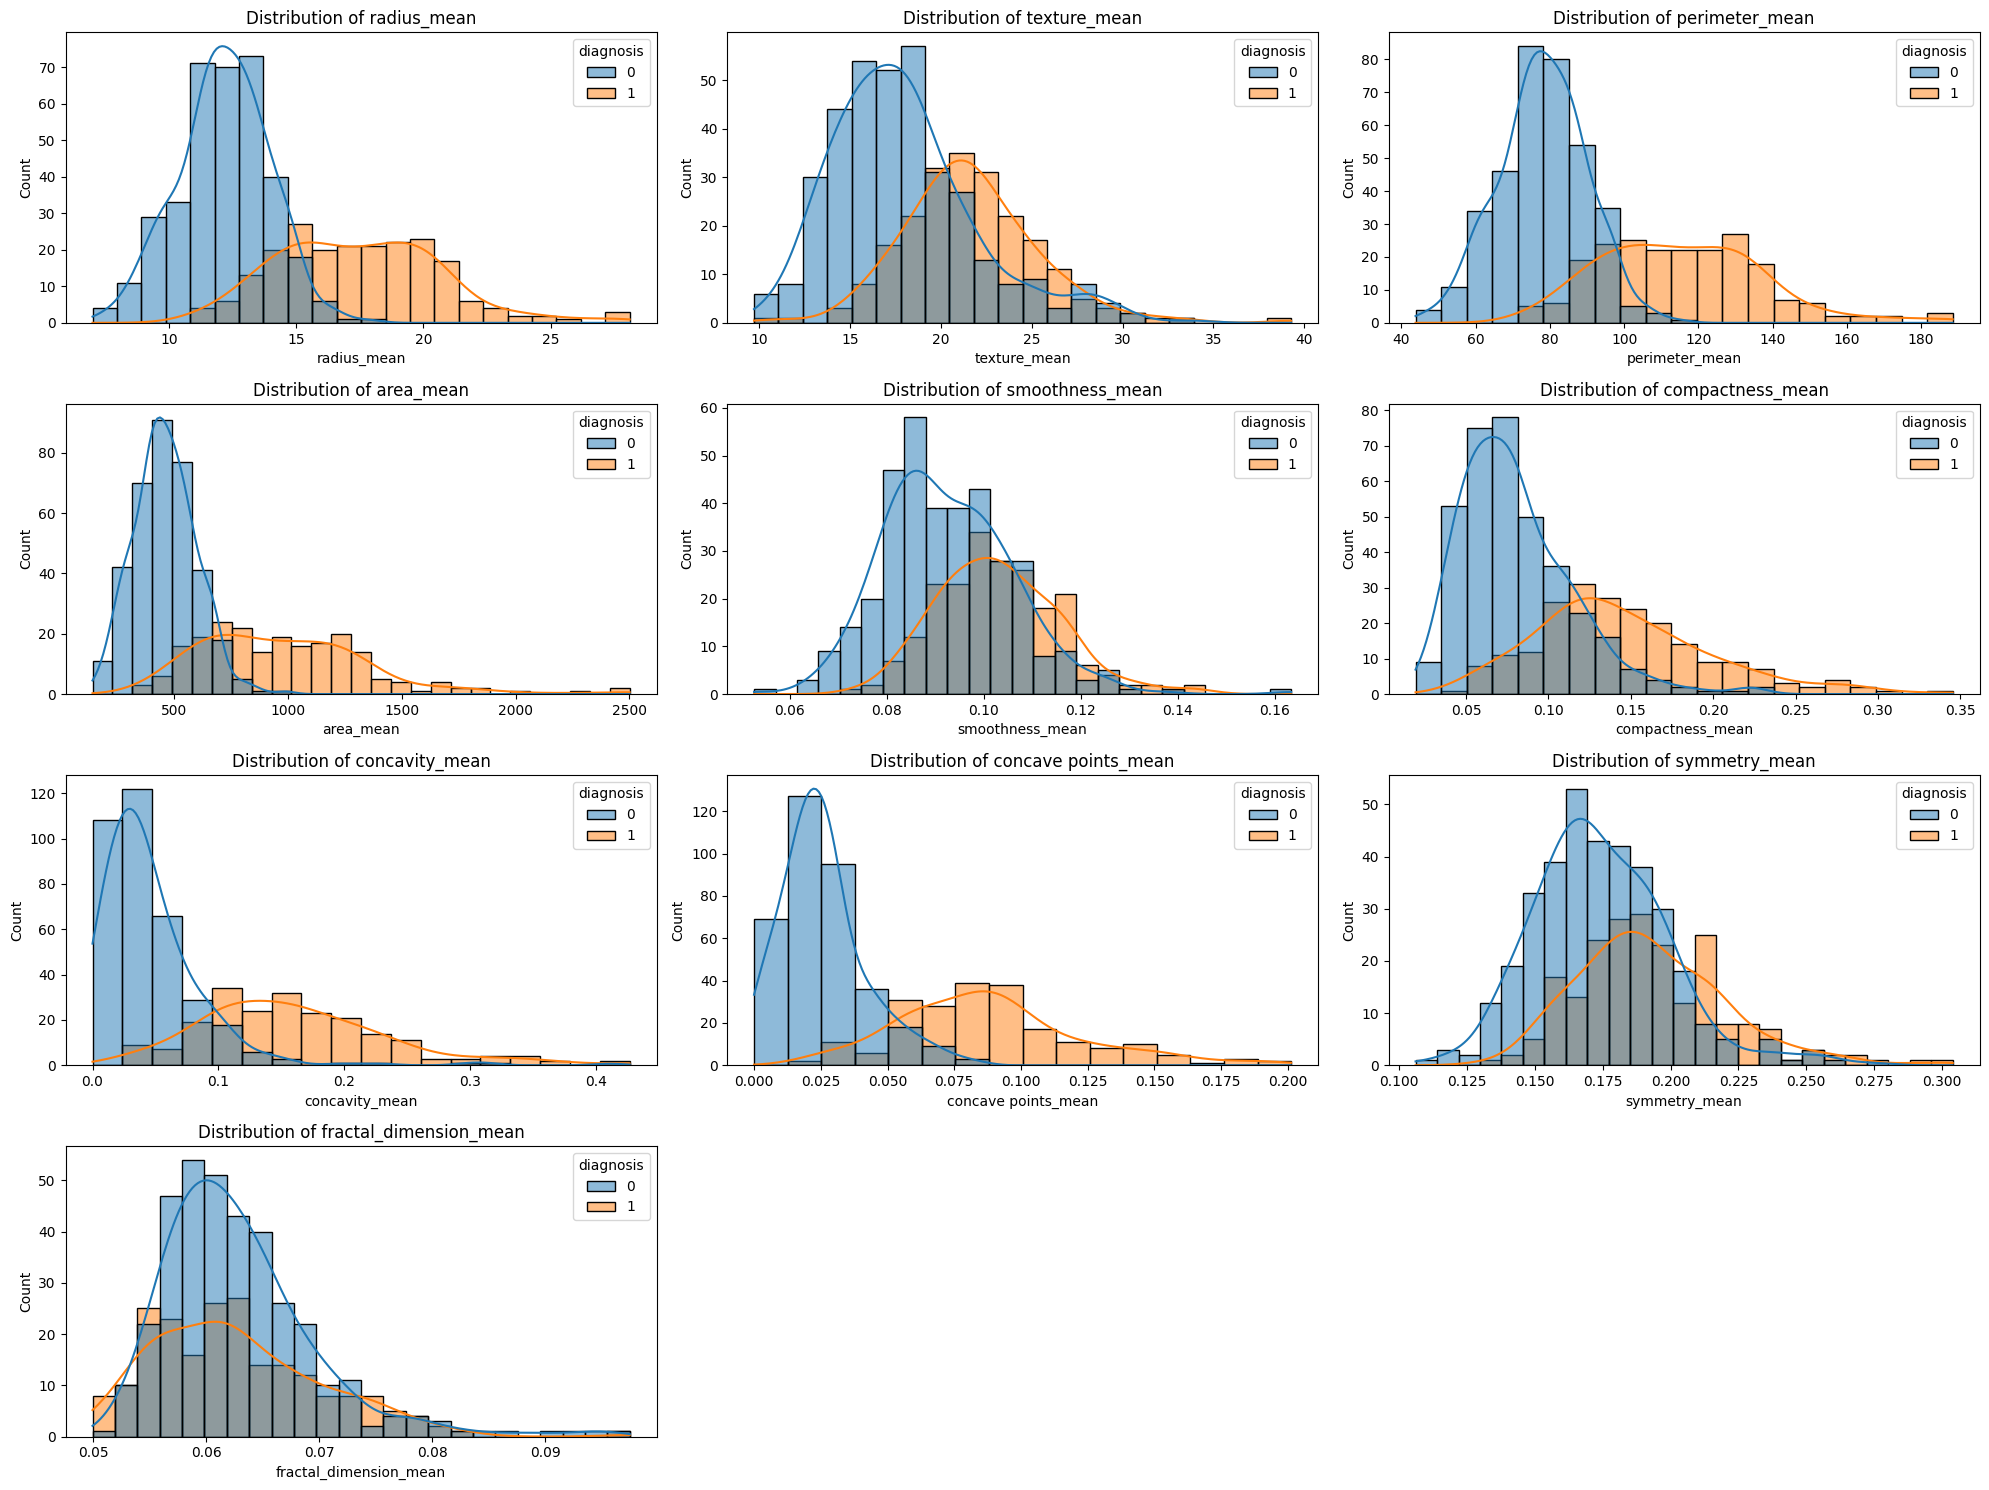

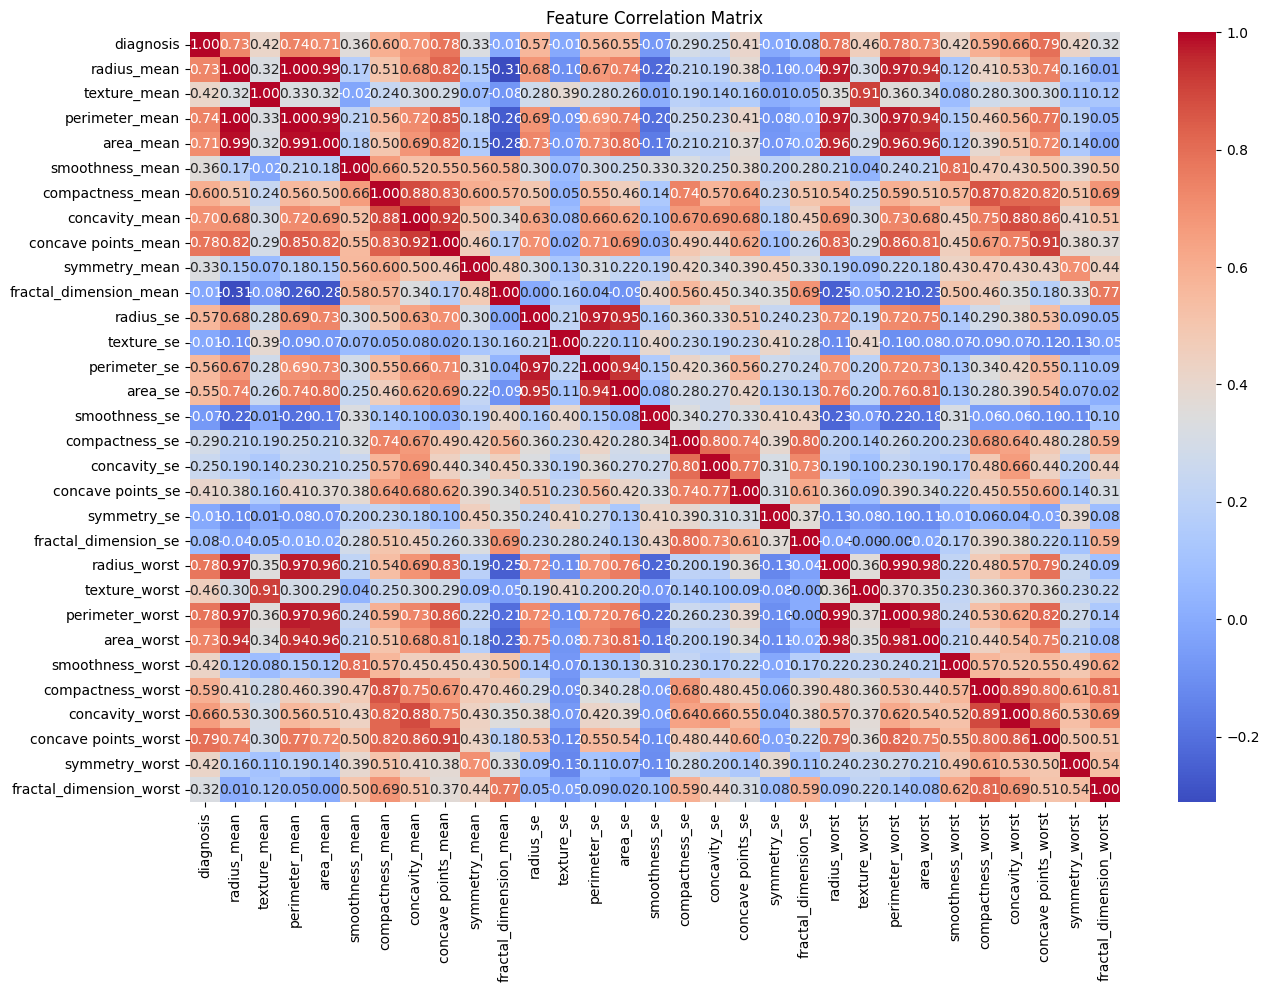

In [2]:
# Plot feature distributions
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data.columns[1:11], 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Matrix')
plt.show()


### Train-Test Split

Data Split: The split between training and testing datasets ensures that the model is evaluated on unseen data, providing a realistic estimate of its performance. Without this, the model could overfit the training data and fail to generalize to new, unseen data. Transposing: The transposition ensures the data is in the right shape for the matrix operations required by the machine learning algorithm. It's necessary to align the data structure for compatibility with subsequent mathematical operations in the model.

In [3]:
from sklearn.model_selection import train_test_split

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Transpose data for matrix operations in logistic regression
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


### Initializing Parameters (Weights and Bias)

This function is defined to initialize the weights and bias parameters of the logistic regression model. The parameter dimension refers to the number of features in the input data (x_train). In the context of this code, it’s assumed to be 4096 (likely the number of pixels in an image dataset, which is commonly the case in image classification tasks).

Initializing bias (b): The bias term b is initialized to 0.0. The bias helps the model make adjustments to its predictions, particularly when all input features are zero. It allows the model to shift the decision boundary, ensuring better fitting for cases where the decision boundary isn't through the origin.

In [4]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)  # Initialize weights
    b = 0.0  # Initialize bias
    return w, b


### Sigmoid Function



The sigmoid function is defined as:

$σ(z)=11+e−z$

$σ(z)=1+e−z1$

The input to the sigmoid function is z, which represents the weighted sum of the inputs (i.e., z=wTx+bz=wTx+b) in the logistic regression model. This value determines the likelihood that the input data belongs to a particular class.



In [5]:
def sigmoid(z):
    y_head=1 / (1 + np.exp(-z))

    return  y_head

#### Forward Propagation



Linear Combination:
$z = np.dot(w.T, x_train) + b$ computes the linear combination of the input features (x_train) and the weights (w), and then adds the bias term (b).

Sigmoid Activation:
y_head = sigmoid(z) applies the sigmoid activation function to the linear combination z. The result y_head is the predicted probability of each input belonging to the positive class.

Loss Function:
The loss is calculated using the binary cross-entropy formula:


$loss=−ytrain⋅log⁡(yhead)−(1−ytrain)⋅log⁡(1−yhead)$


$loss=−ytrain​⋅log(yhead​)−(1−ytrain​)⋅log(1−yhead​)$

This loss function measures how well the model's predictions (y_head) match the true labels (y_train). The closer y_head is to the true class (1 for positive and 0 for negative), the lower the loss.

Cost Function:
The cost is the average of the loss across all training examples:


$cost=1m∑i=1mlossi$


$cost=m1​i=1∑m​lossi​$

where mm is the number of training examples. The cost is the value we aim to minimize during training using gradient descent.
#### Backward Propagation:

Derivative of the Weight:
$derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]$ computes the derivative of the cost with respect to the weights. It shows how much the cost will change if the weight is adjusted, and is used to update the weights during training.

Derivative of the Bias:
$derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]$ computes the derivative of the cost with respect to the bias. It is the s

In [6]:
def forward_backward_propagation(w, b, x_train, y_train):
    # Forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward propagation
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients


### Gradient Descent for Parameter Update

The weights and bias are updated using the gradients computed during backward propagation.

In [7]:
#%%# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


### Model Prediction

Using the trained weights and bias, we make predictions on the test data.

In [8]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
            
    return y_prediction


### Logistic Regression Implementation

The weight and bias are initialized using small random values.
The sigmoid function is used to compute predictions.
A custom implementation of forward and backward propagation is used to compute gradients and update parameters.
The model is trained using gradient descent, and the loss (cost) is minimized over multiple iterations.

Cost after iteration 0: 0.692860
Cost after iteration 10: 0.638692
Cost after iteration 20: 0.613871
Cost after iteration 30: 0.591776
Cost after iteration 40: 0.572024
Cost after iteration 50: 0.554314
Cost after iteration 60: 0.538375
Cost after iteration 70: 0.523968
Cost after iteration 80: 0.510891
Cost after iteration 90: 0.498971


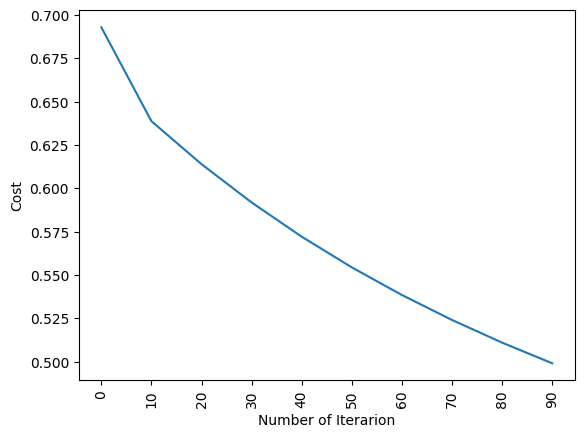

train accuracy: 80.74534161490683 %
test accuracy: 81.3953488372093 %


In [9]:

# %%
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100) 

Model Evaluation Using Sklearn

To compare our custom implementation with scikit-learn's logistic regression, we use the built-in model from sklearn.linear_model.

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=150)
logreg.fit(x_train.T, y_train.T)

train_accuracy_sklearn = logreg.score(x_train.T, y_train.T)
test_accuracy_sklearn = logreg.score(x_test.T, y_test.T)

print(f"Sklearn Train Accuracy: {train_accuracy_sklearn * 100}%")
print(f"Sklearn Test Accuracy: {test_accuracy_sklearn * 100}%")


Sklearn Train Accuracy: 86.33540372670807%
Sklearn Test Accuracy: 89.53488372093024%


### Regularization

To prevent overfitting, we can add L2 regularization to the cost function.

In [11]:
# Define the regularized forward and backward propagation function
def forward_backward_propagation_with_regularization(w, b, x_train, y_train, lambda_):
    # Forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = np.sum(loss) / x_train.shape[1] + (lambda_ / (2 * x_train.shape[1])) * np.sum(np.square(w))
    
    # Backward propagation
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1] + (lambda_ / x_train.shape[1]) * w
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

# Example data
np.random.seed(1)
x_train = np.random.randn(5, 10)  # 5 features, 10 examples
y_train = np.random.randint(0, 2, (1, 10))  # binary labels for 10 examples
w = np.random.randn(5, 1)  # 5 features, 1 output
b = np.random.randn(1)

lambda_ = 0.1  # Regularization strength

# Call the function with regularization
cost, gradients = forward_backward_propagation_with_regularization(w, b, x_train, y_train, lambda_)

print("Cost with Regularization:", cost)
print("Gradients with Regularization:", gradients)


Cost with Regularization: 1.3664537497361149
Gradients with Regularization: {'derivative_weight': array([[0.36797559],
       [0.07533577],
       [0.0424682 ],
       [0.01591703],
       [0.275301  ]]), 'derivative_bias': np.float64(0.19129795613985326)}


In [12]:
# Define the forward and backward propagation function without regularization
def forward_backward_propagation_no_regularization(w, b, x_train, y_train):
    # Forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward propagation
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

# Call the unregularized function
cost_no_reg, gradients_no_reg = forward_backward_propagation_no_regularization(w, b, x_train, y_train)

print("Cost without Regularization:", cost_no_reg)
print("Gradients without Regularization:", gradients_no_reg)


Cost without Regularization: 1.3441162382390286
Gradients without Regularization: {'derivative_weight': array([[0.35549259],
       [0.08291251],
       [0.03658526],
       [0.01244844],
       [0.26163067]]), 'derivative_bias': np.float64(0.19129795613985326)}


---

### Comparison Regularization VS no-Regularization:

| **Aspect**                        | **With Regularization**                                          | **Without Regularization**                                |
|------------------------------------|-------------------------------------------------------------------|-----------------------------------------------------------|
| **Cost Function**                  | Includes binary cross-entropy loss + regularization term         | Only binary cross-entropy loss                            |
| **Gradient of Weights**            | Includes regularization adjustment (`lambda_ * w`)               | Pure gradient based on loss                               |
| **Impact on Model**                | Prevents overfitting by penalizing large weights                 | May lead to overfitting as it doesn’t control weight size |
| **Purpose of Regularization**      | To reduce the complexity of the model and improve generalization | To focus solely on fitting the training data              |

Both functions are part of the same core mechanism of training a logistic regression model. Regularization modifies the training process by adding a term to both the cost function and the gradients, which helps to control model complexity. This makes the model more likely to generalize well, especially on unseen data. Without regularization, the model might perform well on training data but struggle to generalize due to overfitting.